二分类

In [1]:
X = [[1, 1], [2, 1], [1, 2], [2, 2]]
y = [0, 1, 1, 1]

In [2]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf.fit(X, y)

DecisionTreeClassifier()

In [3]:
clf.predict([[3, 3]])

array([1])

In [4]:
from sklearn.tree import export_text
tr = export_text(clf)
print(tr)

|--- feature_0 <= 1.50
|   |--- feature_1 <= 1.50
|   |   |--- class: 0
|   |--- feature_1 >  1.50
|   |   |--- class: 1
|--- feature_0 >  1.50
|   |--- class: 1



In [5]:
import graphviz

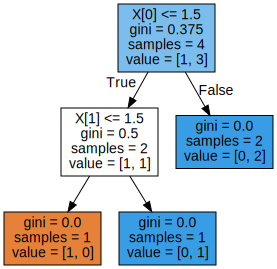

In [6]:
dot_data = tree.export_graphviz(clf, filled = True)
graph = graphviz.Source(dot_data)
graph

In [7]:
import pandas as pd

df = pd.read_csv('organic.csv')
df

,Compound,log(Kow),EHOMO,Q-,ELUMO,Q+,Class
0,methanol,-0.77,-11.135,-0.5353,3.7775,0.3182,1
1,ethanol,-0.31,-11.050,-0.5360,3.6513,0.3107,1
2,1-propanol,0.25,-10.940,-0.5317,3.6324,0.3122,1
3,2-propanol,0.05,-10.895,-0.5469,3.4925,0.3166,1
4,1-butanol,0.88,-10.940,-0.5422,3.5041,0.3141,1
...,...,...,...,...,...,...,...
185,2-nitroaniline,1.85,-9.068,-0.6488,-0.7937,0.3510,2
186,3-nitroaniline,1.37,-9.254,-0.9468,-0.9503,0.3922,2
187,4-nitroaniline,1.39,-9.160,-0.6493,0.7050,0.3134,2
188,2-chloro-4-nitroaniline,2.06,-9.256,-0.6434,-0.9066,0.3183,2


In [8]:
df['Gap'] = df['ELUMO'] - df['EHOMO']
df

,Compound,log(Kow),EHOMO,Q-,ELUMO,Q+,Class,Gap
0,methanol,-0.77,-11.135,-0.5353,3.7775,0.3182,1,14.9125
1,ethanol,-0.31,-11.050,-0.5360,3.6513,0.3107,1,14.7013
2,1-propanol,0.25,-10.940,-0.5317,3.6324,0.3122,1,14.5724
3,2-propanol,0.05,-10.895,-0.5469,3.4925,0.3166,1,14.3875
4,1-butanol,0.88,-10.940,-0.5422,3.5041,0.3141,1,14.4441
...,...,...,...,...,...,...,...,...
185,2-nitroaniline,1.85,-9.068,-0.6488,-0.7937,0.3510,2,8.2743
186,3-nitroaniline,1.37,-9.254,-0.9468,-0.9503,0.3922,2,8.3037
187,4-nitroaniline,1.39,-9.160,-0.6493,0.7050,0.3134,2,9.8650
188,2-chloro-4-nitroaniline,2.06,-9.256,-0.6434,-0.9066,0.3183,2,8.3494


In [9]:
X = df[['Q-', 'Gap']].values
y = df['Class'].values

In [10]:
X.shape, y.shape

((190, 2), (190,))

In [11]:
from sklearn import tree

clf_tree = tree.DecisionTreeClassifier(max_depth = 2)
clf_tree.fit(X, y)

DecisionTreeClassifier(max_depth=2)

# 11:10继续

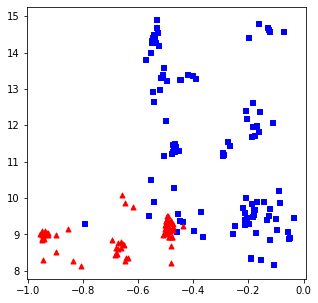

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize = (5, 5))
x1 = df.iloc[:114, 3]
y1 = df.iloc[:114, 7]
x2 = df.iloc[114:, 3]
y2 = df.iloc[114:, 7]
plt.scatter(x1, y1, c='b', marker = 's', s = 25)
plt.scatter(x2, y2, c = 'r', marker = '^', s = 25)
plt.show()

In [13]:
import numpy as np

xx, yy = np.meshgrid(np.arange(-1.0, 0.1, 0.01), np.arange(8, 15.2, 0.01))
coords = np.stack((xx.reshape(-1), yy.reshape(-1)), axis = 1)

In [14]:
coords.shape

(79200, 2)

In [15]:
Z = clf_tree.predict(coords)
Z = Z.reshape(xx.shape)

In [16]:
Z.shape

(720, 110)

<ipython-input-17-b0dd2d972879>:6: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap = light_rgb)


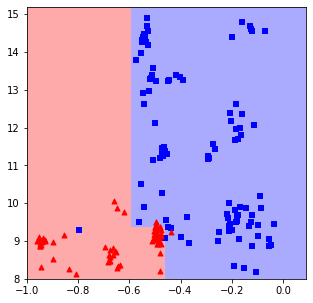

In [17]:
from matplotlib.colors import ListedColormap

light_rgb = ListedColormap(['#AAAAFF', '#FFAAAA'])
plt.figure(figsize = (5, 5))

plt.pcolormesh(xx, yy, Z, cmap = light_rgb)

plt.scatter(x1, y1, c='b', marker = 's', s = 25)
plt.scatter(x2, y2, c = 'r', marker = '^', s = 25)
plt.show()

In [21]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [30]:
clf_svm = make_pipeline(StandardScaler(), SVC(kernel = 'rbf'))
clf_svm.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])

In [27]:
Z = clf_svm.predict(coords)
Z = Z.reshape(xx.shape)

<ipython-input-28-b0dd2d972879>:6: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap = light_rgb)


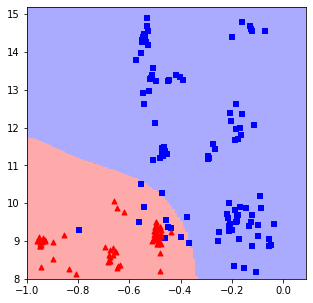

In [28]:
from matplotlib.colors import ListedColormap

light_rgb = ListedColormap(['#AAAAFF', '#FFAAAA'])
plt.figure(figsize = (5, 5))

plt.pcolormesh(xx, yy, Z, cmap = light_rgb)

plt.scatter(x1, y1, c='b', marker = 's', s = 25)
plt.scatter(x2, y2, c = 'r', marker = '^', s = 25)
plt.show()